In [1]:
import sys
sys.path.insert(0, '/Users/nina/Documents/treemap/treemap/analysis')
from config_figures import *
import os
os.chdir('/Users/nina/Documents/treemap/treemap/data/')

In [2]:
ecoregions_species_sampled = pd.read_csv('ecoregion_species_sampled.csv')
ecoregions_species_sampled['ECO_ID'] = ecoregions_species_sampled.apply(lambda x: x.site.split('_')[1], axis=1).astype('int')
ecoregions_species_sampled['current_or_future'] = ecoregions_species_sampled.apply(lambda x: x.site.split('_')[2], axis=1)
ecoregions_species_sampled = ecoregions_species_sampled.drop(columns=['site']).set_index(['ECO_ID','current_or_future'])
ecoregions_species_sampled

Abarema_barbouriana  Abarema_brachystachya  \
ECO_ID current_or_future                                               
460    current                            1.0                    0.0   
       future                             1.0                    0.0   
306    current                            0.0                    0.0   
       future                             0.0                    0.0   
474    current                            1.0                    1.0   
...                                       ...                    ...   
479    future                             1.0                    0.0   
492    current                            0.0                    1.0   
       future                             0.0                    1.0   
486    current                            1.0                    0.0   
       future                             1.0                    1.0   

                          Abarema_cochleata  Abarema_filamentosa  \
ECO_ID current_or_future                                           
460    current                          0.0                  0.0   
       future                           0.0                  0.0   
306    current                          0.0                  0.0   
       future                           0.0                  0.0   
474    current                          1.0                  0.0   
...                                     ...                  ...   
479    future                           0.0                  0.0   
492    current                          0.0                  1.0   
       future                           1.0                  1.0   
486    current                          0.0                  0.0   
       future                           0.0                  0.0   

                          Abarema_jupunba  Abarema_laeta  \
ECO_ID current_or_future                                   
460    current                        1.0            1.0   
       future                         1.0            1.0   
306    current                        0.0            0.0   
       future                         0.0            0.0   
474    current                        1.0            1.0   
...                                   ...            ...   
479    future                         1.0            1.0   
492    current                        1.0            0.0   
       future                         1.0            0.0   
486    current                        1.0            1.0   
       future                         1.0            1.0   

                          Abarema_langsdorffii  Abatia_parviflora  Abies_alba  \
ECO_ID current_or_future                                                        
460    current                             0.0                1.0         0.0   
       future                              0.0                1.0         0.0   
306    current                             0.0                0.0         0.0   
       future                              0.0                0.0         0.0   
474    current                             0.0                0.0         0.0   
...                                        ...                ...         ...   
479    future                              0.0                1.0         0.0   
492    current                             1.0                0.0         0.0   
       future                              1.0                0.0         0.0   
486    current                             0.0                1.0         0.0   
       future                              0.0                1.0         0.0   

                          Abies_amabilis  ...  Zygia_cataractae  \
ECO_ID current_or_future                  ...                     
460    current                       0.0  ...               1.0   
       future                        0.0  ...               1.0   
306    current                       0.0  ...               0.0   
       future                     

In [3]:
sdms_area_lat_elev = pd.read_csv('sdms_area_lat_elev.csv', index_col=['species','climate']).drop(columns=['system:index','.geo'])
sdms_area_lat_elev = sdms_area_lat_elev[sdms_area_lat_elev['min_tree_cover'] == 0]
sdms_area_lat_elev

,,area,median_elev,median_lat,min_tree_cover
species,climate,,,,
Abarema_barbouriana,1981_2010,9.416606e+11,271.175664,3.628973,0
Abarema_brachystachya,1981_2010,8.040583e+11,583.798649,-20.127242,0
Abarema_cochleata,1981_2010,5.791520e+11,46.901477,-2.438856,0
Abarema_filamentosa,1981_2010,3.037458e+11,251.950137,-12.438020,0
Abarema_jupunba,1981_2010,3.035330e+12,199.640084,2.124966,0
...,...,...,...,...,...
Zygia_latifolia,2071_2100_ssp585,5.360228e+12,199.549619,-2.251095,0
Zygia_longifolia,2071_2100_ssp585,9.454284e+11,303.168667,5.373069,0
Zygia_racemosa,2071_2100_ssp585,4.274584e+12,135.514965,-2.625524,0


In [4]:
def lat_elev_shift(row):
    species_df = sdms_area_lat_elev.loc[row.species]
    delta = species_df.loc['2071_2100_ssp585'] - species_df.loc['1981_2010']
    row['abs_lat_shift'] = abs(delta['median_lat'])
    row['elev_shift'] = delta['median_elev']
    return row

lat_elev_shift_df = pd.DataFrame({
    'species': sdms_area_lat_elev.index.get_level_values('species').copy().drop_duplicates()
}).apply(lat_elev_shift, axis=1)
lat_elev_shift_df

,species,abs_lat_shift,elev_shift
0,Abarema_barbouriana,0.752466,128.403792
1,Abarema_brachystachya,11.006968,-320.151112
2,Abarema_cochleata,0.063591,64.842935
3,Abarema_filamentosa,10.998948,23.808529
4,Abarema_jupunba,2.001480,-32.061068
...,...,...,...
10585,Zygia_latifolia,1.374710,19.882951
10586,Zygia_longifolia,0.005121,63.713462
10587,Zygia_racemosa,2.999650,-0.056173
10588,Zygia_unifoliolata,1.500474,63.365200


In [22]:
def n_lost_gained(row):
    eco_species = ecoregions_species_sampled.loc[row.ECO_ID]

    delta_species = (eco_species.loc['current'] - eco_species.loc['future']).to_list()
    row['n_current'] = eco_species.loc['current'].to_list().count(1)
    row['n_future'] = eco_species.loc['future'].to_list().count(1)
    row['n_lost'] = delta_species.count(1)
    row['n_gained'] = delta_species.count(-1)

    species_current_future = eco_species.columns[eco_species.sum() == 2].to_list()
    species_lat_elev_shift = lat_elev_shift_df[lat_elev_shift_df['species'].isin(species_current_future)]
    row['median_abs_lat_shift'] = species_lat_elev_shift['abs_lat_shift'].median()
    row['median_elev_shift'] = species_lat_elev_shift['elev_shift'].median()

    return row

eco_df = pd.DataFrame({
    'ECO_ID': ecoregions_species_sampled.index.get_level_values('ECO_ID').copy().drop_duplicates()
}).apply(n_lost_gained, axis=1)
eco_df['frac_gained'] = (eco_df['n_gained'] / eco_df['n_current']) * 100
eco_df['frac_lost'] = (eco_df['n_lost'] / eco_df['n_current']) * 100
eco_df

,ECO_ID,n_current,n_future,n_lost,n_gained,median_abs_lat_shift,median_elev_shift,frac_gained,frac_lost
0,460.0,3017.0,3054.0,29.0,66.0,1.498638,15.818595,2.187604,0.961220
1,306.0,804.0,797.0,35.0,28.0,1.499095,0.071650,3.482587,4.353234
2,474.0,1554.0,1753.0,121.0,320.0,1.250964,-0.198363,20.592021,7.786358
3,448.0,3080.0,3090.0,25.0,35.0,1.497438,15.944597,1.136364,0.811688
4,689.0,210.0,212.0,7.0,9.0,5.498076,-31.890687,4.285714,3.333333
...,...,...,...,...,...,...,...,...,...
492,337.0,561.0,686.0,64.0,189.0,2.266211,32.168345,33.689840,11.408200
493,445.0,1744.0,1293.0,509.0,58.0,1.748781,-31.979270,3.325688,29.185780
494,479.0,2306.0,2508.0,67.0,269.0,1.502058,0.383821,11.665221,2.905464
495,492.0,1809.0,1625.0,215.0,31.0,1.750695,-32.036579,1.713654,11.885019


In [23]:
nmds_eucl_dist = pd.read_csv('nmds_current_future_eucl_dist.csv')[['ECO_ID', 'eucl_dist', 'eucl_dist_scaled']].rename(
    columns={'eucl_dist': 'NMDS_eucl_dist', 'eucl_dist_scaled': 'NMDS_eucl_dist_scaled'}
)
evopca_eucl_dist = pd.read_csv('evoPCA_current_future_eucl_dist.csv')[['ECO_ID', 'eucl_dist', 'eucl_dist_scaled']].rename(
    columns={'eucl_dist': 'evoPCA_eucl_dist', 'eucl_dist_scaled': 'evoPCA_eucl_dist_scaled'}
)
nmds_evopca_df = pd.merge(nmds_eucl_dist, evopca_eucl_dist)

eco_df = pd.merge(eco_df, nmds_evopca_df)
eco_df 

,ECO_ID,n_current,n_future,n_lost,n_gained,median_abs_lat_shift,median_elev_shift,frac_gained,frac_lost,NMDS_eucl_dist,NMDS_eucl_dist_scaled,evoPCA_eucl_dist,evoPCA_eucl_dist_scaled
0,460.0,3017.0,3054.0,29.0,66.0,1.498638,15.818595,2.187604,0.961220,0.007354,0.002505,0.000595,0.001056
1,306.0,804.0,797.0,35.0,28.0,1.499095,0.071650,3.482587,4.353234,0.054398,0.019989,0.007080,0.011054
2,474.0,1554.0,1753.0,121.0,320.0,1.250964,-0.198363,20.592021,7.786358,0.095689,0.030682,0.013628,0.020066
3,448.0,3080.0,3090.0,25.0,35.0,1.497438,15.944597,1.136364,0.811688,0.004505,0.001412,0.002405,0.003637
4,689.0,210.0,212.0,7.0,9.0,5.498076,-31.890687,4.285714,3.333333,0.004759,0.001614,0.004161,0.008224
...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,337.0,561.0,686.0,64.0,189.0,2.266211,32.168345,33.689840,11.408200,0.197688,0.071686,0.068127,0.097816
489,445.0,1744.0,1293.0,509.0,58.0,1.748781,-31.979270,3.325688,29.185780,0.065631,0.024449,0.022745,0.047738
490,479.0,2306.0,2508.0,67.0,269.0,1.502058,0.383821,11.665221,2.905464,0.034187,0.012521,0.007729,0.011306
491,492.0,1809.0,1625.0,215.0,31.0,1.750695,-32.036579,1.713654,11.885019,0.025746,0.007293,0.010011,0.021458


In [7]:
forest_ecoregions = ecoregions.filter(ee.Filter.stringContains('BIOME_NAME', 'Forest')).getInfo()['features']

In [24]:
props = ['BIOME_NAME','ECO_ID']
eco_df = pd.merge(eco_df, pd.DataFrame([[item['properties'][p] for p in props] for item in forest_ecoregions], columns=props))

In [25]:
eco_df

,ECO_ID,n_current,n_future,n_lost,n_gained,median_abs_lat_shift,median_elev_shift,frac_gained,frac_lost,NMDS_eucl_dist,NMDS_eucl_dist_scaled,evoPCA_eucl_dist,evoPCA_eucl_dist_scaled,BIOME_NAME
0,460.0,3017.0,3054.0,29.0,66.0,1.498638,15.818595,2.187604,0.961220,0.007354,0.002505,0.000595,0.001056,Tropical & Subtropical Moist Broadleaf Forests
1,306.0,804.0,797.0,35.0,28.0,1.499095,0.071650,3.482587,4.353234,0.054398,0.019989,0.007080,0.011054,Temperate Broadleaf & Mixed Forests
2,474.0,1554.0,1753.0,121.0,320.0,1.250964,-0.198363,20.592021,7.786358,0.095689,0.030682,0.013628,0.020066,Tropical & Subtropical Moist Broadleaf Forests
3,448.0,3080.0,3090.0,25.0,35.0,1.497438,15.944597,1.136364,0.811688,0.004505,0.001412,0.002405,0.003637,Tropical & Subtropical Moist Broadleaf Forests
4,689.0,210.0,212.0,7.0,9.0,5.498076,-31.890687,4.285714,3.333333,0.004759,0.001614,0.004161,0.008224,Temperate Conifer Forests
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,337.0,561.0,686.0,64.0,189.0,2.266211,32.168345,33.689840,11.408200,0.197688,0.071686,0.068127,0.097816,Temperate Broadleaf & Mixed Forests
531,445.0,1744.0,1293.0,509.0,58.0,1.748781,-31.979270,3.325688,29.185780,0.065631,0.024449,0.022745,0.047738,Tropical & Subtropical Moist Broadleaf Forests
532,479.0,2306.0,2508.0,67.0,269.0,1.502058,0.383821,11.665221,2.905464,0.034187,0.012521,0.007729,0.011306,Tropical & Subtropical Moist Broadleaf Forests
533,492.0,1809.0,1625.0,215.0,31.0,1.750695,-32.036579,1.713654,11.885019,0.025746,0.007293,0.010011,0.021458,Tropical & Subtropical Moist Broadleaf Forests


In [26]:
eco_df.to_csv('climate_change_ecoregion_df.csv', index=False)

In [27]:
biome_names = {
    'Boreal Forests/Taiga': 'Boreal Forests',
    'Mediterranean Forests, Woodlands & Scrub': 'Mediterranean Forests',
    'Temperate Broadleaf & Mixed Forests': 'Temperate Broadleaf Forests', 
    'Temperate Conifer Forests': 'Temperate Conifer Forests',
    'Tropical & Subtropical Coniferous Forests': 'Tropical Coniferous Forests',
    'Tropical & Subtropical Dry Broadleaf Forests': 'Tropical Dry Broadleaf Forests',
    'Tropical & Subtropical Moist Broadleaf Forests': 'Tropical Moist Broadleaf Forests'
}
eco_df['BIOME_NAME'] = eco_df['BIOME_NAME'].apply(lambda b: biome_names[b])

In [31]:
df_melted = pd.melt(eco_df, id_vars=['BIOME_NAME','ECO_ID'], value_vars=[
    'frac_lost', 'frac_gained', 'median_abs_lat_shift', 'median_elev_shift', 
    'NMDS_eucl_dist_scaled', 'evoPCA_eucl_dist_scaled'
]) 
df_melted

,BIOME_NAME,ECO_ID,variable,value
0,Tropical Moist Broadleaf Forests,460.0,frac_lost,0.961220
1,Temperate Broadleaf Forests,306.0,frac_lost,4.353234
2,Tropical Moist Broadleaf Forests,474.0,frac_lost,7.786358
3,Tropical Moist Broadleaf Forests,448.0,frac_lost,0.811688
4,Temperate Conifer Forests,689.0,frac_lost,3.333333
...,...,...,...,...
3205,Temperate Broadleaf Forests,337.0,evoPCA_eucl_dist_scaled,0.097816
3206,Tropical Moist Broadleaf Forests,445.0,evoPCA_eucl_dist_scaled,0.047738
3207,Tropical Moist Broadleaf Forests,479.0,evoPCA_eucl_dist_scaled,0.011306
3208,Tropical Moist Broadleaf Forests,492.0,evoPCA_eucl_dist_scaled,0.021458


AxesSubplot(0.2655,0.560972;0.216917x0.385694) Absolute latitude shift (°)
AxesSubplot(0.515292,0.560972;0.216917x0.385694) Fraction gained species (%)
AxesSubplot(0.765083,0.560972;0.216917x0.385694) Change in phylogenetic composition
AxesSubplot(0.2655,0.08875;0.216917x0.385694) Elevation shift (m)
AxesSubplot(0.515292,0.08875;0.216917x0.385694) Fraction lost species (%)
AxesSubplot(0.765083,0.08875;0.216917x0.385694) Change in taxonomic composition


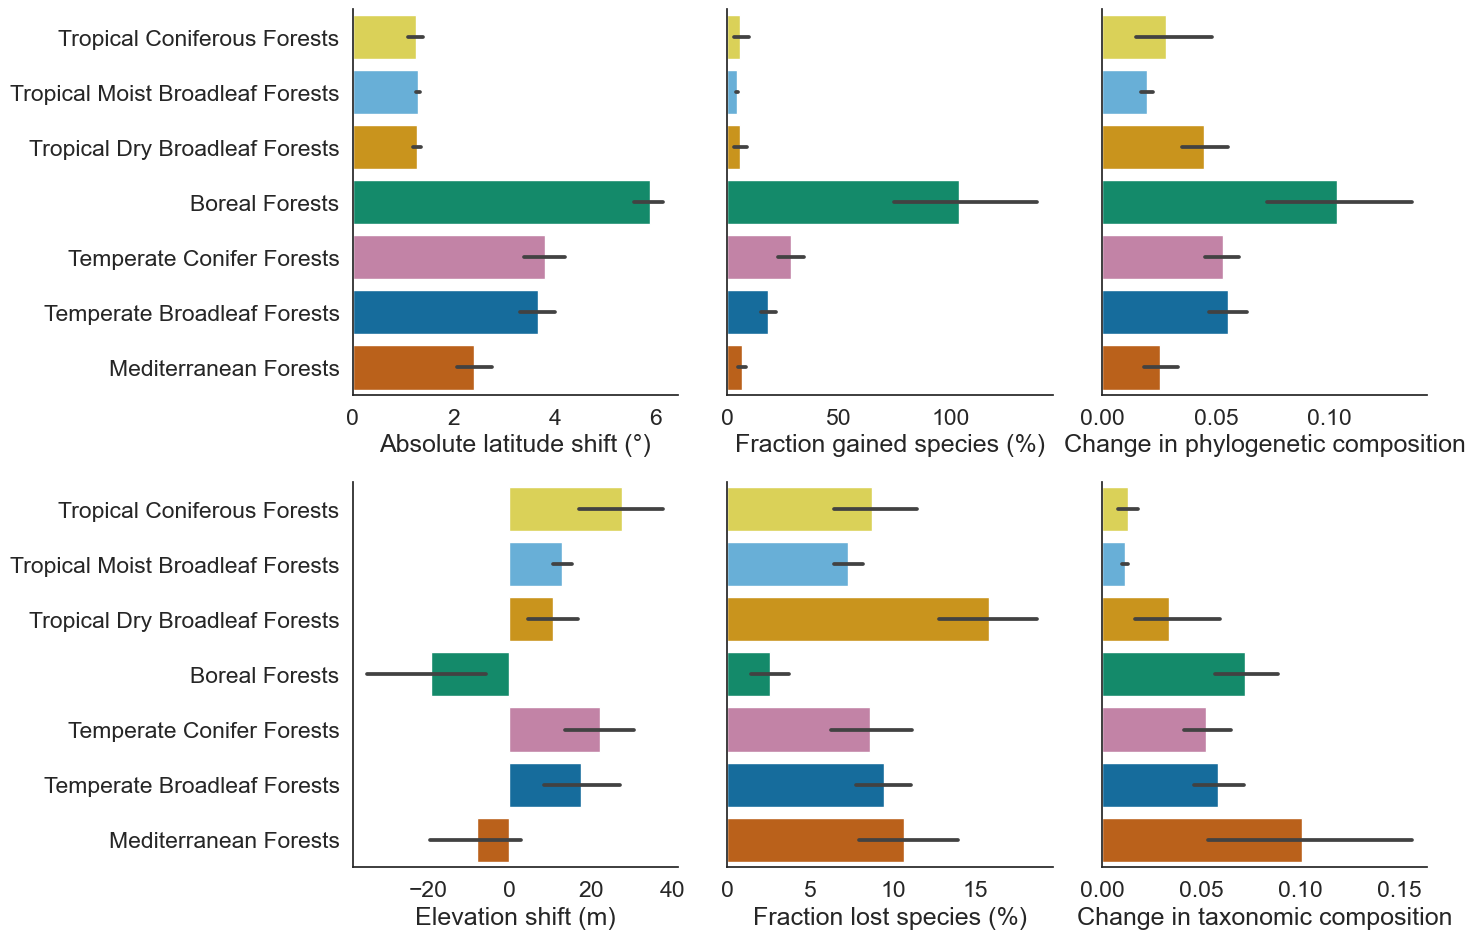

In [104]:
sns.set(style='white', font_scale = 1.5)
g = sns.catplot(
    data=df_melted, y='BIOME_NAME', x='value', col='variable', kind='bar', estimator='mean', errorbar=('ci', 95), 
    sharex=False, col_wrap=3, palette=['#F0E442', '#56B4E9', '#E69F00', '#009E73', '#CC79A7', '#0072B2', '#D55E00'],
    order=['Tropical Coniferous Forests','Tropical Moist Broadleaf Forests','Tropical Dry Broadleaf Forests',
           'Boreal Forests','Temperate Conifer Forests','Temperate Broadleaf Forests','Mediterranean Forests'],
    col_order=['median_abs_lat_shift','frac_gained','evoPCA_eucl_dist_scaled',
               'median_elev_shift','frac_lost','NMDS_eucl_dist_scaled']
)
g.set_ylabels("")
# g.set_xticklabels(rotation=90)
for ax, lab in zip(g.axes, [
    'Absolute latitude shift (°)', 'Fraction gained species (%)', 'Change in phylogenetic composition',
    'Elevation shift (m)', 'Fraction lost species (%)', 'Change in taxonomic composition'
]):
    print(ax, lab)
    ax.set_xlabel(lab)
    ax.set_title("")
plt.savefig('../figures/climate_change_barplots.png', bbox_inches='tight')

# Statistics

In [46]:
from sklearn.preprocessing import scale
from statsmodels.multivariate.manova import MANOVA

In [55]:
manova_result = MANOVA.from_formula(
    'median_abs_lat_shift + median_elev_shift + frac_lost + frac_gained + NMDS_eucl_dist_scaled + evoPCA_eucl_dist_scaled ~ BIOME_NAME', 
    eco_df)
print(manova_result.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
         Intercept        Value  Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.2685 6.0000 523.0000 237.4481 0.0000
           Pillai's trace 0.7315 6.0000 523.0000 237.4481 0.0000
   Hotelling-Lawley trace 2.7241 6.0000 523.0000 237.4481 0.0000
      Roy's greatest root 2.7241 6.0000 523.0000 237.4481 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
       BIOME_NAME       Value   Num DF   Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.1470 36.0000 2299.4147  34.9718 0.0000
         Pillai's trace 1.2804 36.0000 3168.0

In [97]:
# Coefficient of variation 
vars = [
    'frac_lost', 'frac_gained', 'median_abs_lat_shift', 'median_elev_shift', 'NMDS_eucl_dist_scaled', 'evoPCA_eucl_dist_scaled'
]
eco_df[vars].std() / eco_df[vars].mean()

frac_lost                  1.014089
frac_gained                2.171418
median_abs_lat_shift       0.731109
median_elev_shift          3.068363
NMDS_eucl_dist_scaled      2.263429
evoPCA_eucl_dist_scaled    1.112795
dtype: float64

## Absolute latitude shift

In [71]:
abs_lat_shift_stats = eco_df.groupby('BIOME_NAME').median_abs_lat_shift.agg(['min','median','max','mean','std','sem'])
abs_lat_shift_stats['C95_low'] = abs_lat_shift_stats['mean'] - 1.96 * abs_lat_shift_stats['sem'] 
abs_lat_shift_stats['C95_high'] = abs_lat_shift_stats['mean'] + 1.96 * abs_lat_shift_stats['sem']
abs_lat_shift_stats

,min,median,max,mean,std,sem,C95_low,C95_high
BIOME_NAME,,,,,,,,
Boreal Forests,3.999020,6.002602,6.749419,5.883701,0.754159,0.147903,5.593811,6.173590
Mediterranean Forests,0.626594,1.500645,5.182784,2.395362,1.422546,0.182138,2.038371,2.752353
Temperate Broadleaf Forests,0.998766,3.873489,6.000408,3.658647,1.738456,0.182240,3.301457,4.015837
Temperate Conifer Forests,1.499595,4.063130,6.000408,3.802790,1.469239,0.209891,3.391404,4.214177
Tropical Coniferous Forests,0.750270,1.182397,1.746848,1.246067,0.301858,0.080675,1.087944,1.404190
Tropical Dry Broadleaf Forests,0.625879,1.251461,2.246967,1.270079,0.325676,0.043914,1.184008,1.356151
Tropical Moist Broadleaf Forests,0.505705,1.253759,2.248637,1.288391,0.286379,0.018524,1.252083,1.324698


In [74]:
# absolute latitude shift in ecoregions in tropical forest biomes
tropical_abs_lat_shift = eco_df[eco_df.BIOME_NAME.str.contains('Tropical')].median_abs_lat_shift

# mean
tropical_abs_lat_shift_mean = tropical_abs_lat_shift.mean() 
print('mean: ', tropical_abs_lat_shift_mean) # mean

tropical_abs_lat_shift_sem = tropical_abs_lat_shift.sem() # standard error of the mean
print('95% CI: ',
    tropical_abs_lat_shift_mean - 1.96 * tropical_abs_lat_shift_sem, 
    tropical_abs_lat_shift_mean + 1.96 * tropical_abs_lat_shift_sem) # CI95 low and high boundaries


mean:  1.2831970603407674
95% CI:  1.250405753917894 1.3159883667636407


## Elevation shift

In [89]:
eco_df.groupby('BIOME_NAME').median_elev_shift.agg(['min','median','max','mean','std','sem'])

,min,median,max,mean,std,sem
BIOME_NAME,,,,,,
Boreal Forests,-95.945779,-1.947184,32.248830,-19.294840,39.002329,7.648986
Mediterranean Forests,-104.127824,15.781059,64.020858,-7.966319,47.119541,6.033039
Temperate Broadleaf Forests,-70.081187,16.003316,127.925896,17.698675,45.087641,4.726469
Temperate Conifer Forests,-64.507403,31.991406,95.638862,22.194291,32.180772,4.597253
Tropical Coniferous Forests,0.032578,32.032737,72.297468,27.633483,21.039783,5.623119
Tropical Dry Broadleaf Forests,-32.103389,8.492064,64.067880,10.754868,23.024723,3.104653
Tropical Moist Broadleaf Forests,-32.251365,15.944597,83.982537,12.984244,19.462528,1.258926


In [102]:
eco_df[(eco_df.median_elev_shift < 5) & (eco_df.median_elev_shift > -5)].shape[0] / eco_df.shape[0]

0.2411214953271028

In [91]:
# mean elevation shift in ecoregions in temperate forest biomes
eco_df[eco_df.BIOME_NAME.str.contains('Temperate')].median_elev_shift.mean()

19.27214093922851

## Fraction of species lost and gained

In [96]:
eco_df.groupby('BIOME_NAME').frac_lost.agg(['mean','min','max'])

,mean,min,max
BIOME_NAME,,,
Boreal Forests,2.575907,0.000000,9.090909
Mediterranean Forests,10.678202,0.000000,54.166667
Temperate Broadleaf Forests,9.475366,0.000000,39.473684
Temperate Conifer Forests,8.602973,0.000000,41.666667
Tropical Coniferous Forests,8.758667,3.743619,18.750000
Tropical Dry Broadleaf Forests,15.824279,0.000000,53.846154
Tropical Moist Broadleaf Forests,7.293615,0.000000,45.136778
